In [36]:
"""
Loads result to dataframe and analyzes the results
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from format_urls.load_results_to_dataframe import load_results_to_dataframe


notebook_dir = os.getcwd()

In [37]:
top_10k = load_results_to_dataframe(
    file_name="data/top-10000-pages-and-screens-30-days-doi-20240915.csv",
    notebook_dir=notebook_dir,
)

top_10k["url"] = top_10k.apply(
    lambda row: "https://" + str(row["domain"]) + str(row["pagePath"]), axis=1
)

top_10k.head(5000)

,page_title,domain,pagePath,pageviews,url
0,Latest Earthquakes,earthquake.usgs.gov,/earthquakes/map/,26558509,https://earthquake.usgs.gov/earthquakes/map/
1,Webcam (U.S. National Park Service),www.nps.gov,/media/webcam/view.htm,675631,https://www.nps.gov/media/webcam/view.htm
2,NPS.gov Homepage (U.S. National Park Service),www.nps.gov,/index.htm,628059,https://www.nps.gov/index.htm
3,EarthExplorer,earthexplorer.usgs.gov,/,477572,https://earthexplorer.usgs.gov/
4,Places to Get Interagency Passes (U.S. Nationa...,www.nps.gov,/planyourvisit/pickup-pass-locations.htm,437395,https://www.nps.gov/planyourvisit/pickup-pass-...
...,...,...,...,...,...
4995,Mesa Top Loop Drive Audio Tour: A Pueblo Persp...,www.nps.gov,/podcasts/podcasts-mtl-audiotour.htm,1701,https://www.nps.gov/podcasts/podcasts-mtl-audi...
4996,Scheduled Classes and Events | U.S. Fish & Wil...,www.fws.gov,/training/scheduled-classes-and-events,1701,https://www.fws.gov/training/scheduled-classes...
4997,TNM uGET Instructions,apps.nationalmap.gov,/uget-instructions/index.html,1701,https://apps.nationalmap.gov/uget-instructions...
4998,Alaska | Bureau of Land Management,www.blm.gov,/alaska,1699,https://www.blm.gov/alaska


In [38]:
nps = pd.DataFrame(top_10k[top_10k["domain"] == "www.nps.gov"])

In [39]:
# Vectorize the pagePath using TF-IDF
vectorizer = TfidfVectorizer(
    # ngram_range=(1, 1)
)
X = vectorizer.fit_transform(nps["pagePath"])

# Use KMeans to cluster the URLs
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
nps.loc[:, "cluster"] = kmeans.labels_

# Displaying the first few rows with the assigned clusters
nps.head(5000)

,page_title,domain,pagePath,pageviews,url,cluster
1,Webcam (U.S. National Park Service),www.nps.gov,/media/webcam/view.htm,675631,https://www.nps.gov/media/webcam/view.htm,15
2,NPS.gov Homepage (U.S. National Park Service),www.nps.gov,/index.htm,628059,https://www.nps.gov/index.htm,18
4,Places to Get Interagency Passes (U.S. Nationa...,www.nps.gov,/planyourvisit/pickup-pass-locations.htm,437395,https://www.nps.gov/planyourvisit/pickup-pass-...,15
10,Yellowstone National Park (U.S. National Park ...,www.nps.gov,/yell/index.htm,325076,https://www.nps.gov/yell/index.htm,18
11,Entrance Fees by Park (U.S. National Park Serv...,www.nps.gov,/aboutus/entrance-fee-prices.htm,274355,https://www.nps.gov/aboutus/entrance-fee-price...,15
...,...,...,...,...,...,...
7238,The Big Lockup: Mass Incarceration in the U.S....,www.nps.gov,/alca/thebiglockup.htm,1126,https://www.nps.gov/alca/thebiglockup.htm,15
7239,Trip Plan (U.S. National Park Service),www.nps.gov,/articles/gtgtripplan.htm,1126,https://www.nps.gov/articles/gtgtripplan.htm,14
7240,Trip Planning - Rocky Mountain National Park (...,www.nps.gov,/romo/planyourvisit/trip-planning.htm,1126,https://www.nps.gov/romo/planyourvisit/trip-pl...,6
7242,Apgar Visitor Center (U.S. National Park Service),www.nps.gov,/places/apgar-visitor-center.htm,1123,https://www.nps.gov/places/apgar-visitor-cente...,9


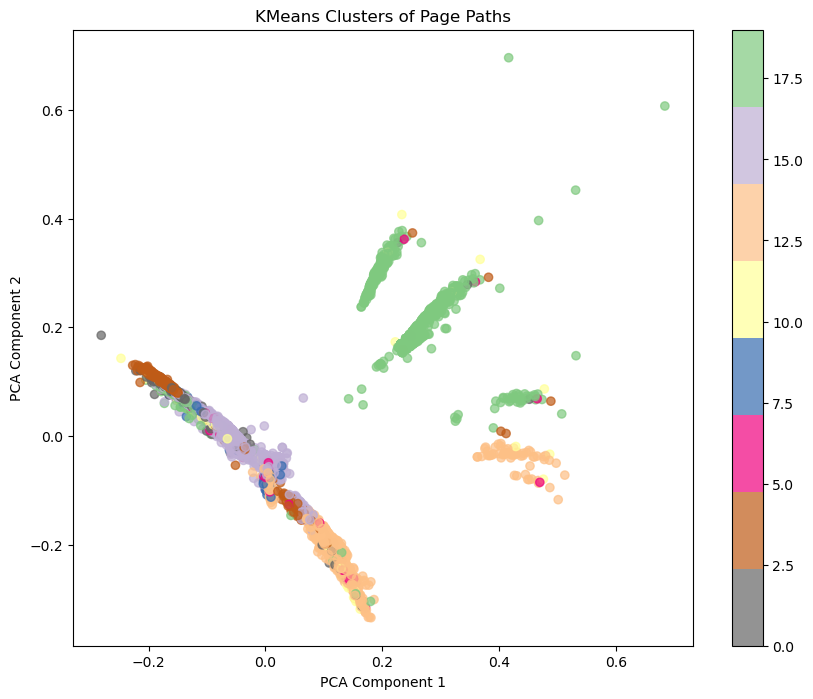

In [40]:
# Plot the clusters (optional, if you want to visualize)
# Generate a 2D plot using PCA (Principal Component Analysis)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="Accent_r", alpha=0.7
)
plt.colorbar(scatter)
plt.title("KMeans Clusters of Page Paths")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [41]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def extract_features(url):
    # Extract meaningful parts from the URL
    parts = url.split('/')
    return ' '.join([part for part in parts if part and not part.startswith('www.')])

def preprocess_urls(urls):
    return [extract_features(url) for url in urls]

def find_optimal_k(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    return silhouette_scores.index(max(silhouette_scores)) + 2

def cluster_urls(urls, max_k=300):
    # Preprocess URLs
    processed_urls = preprocess_urls(urls)

    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(processed_urls)

    # Find optimal number of clusters
    optimal_k = find_optimal_k(X, max_k)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)

    # Group URLs by cluster
    clusters = {i: [] for i in range(optimal_k)}
    for url, label in zip(urls, kmeans.labels_):
        clusters[label].append(url)

    return clusters

urls = nps["pagePath"].to_list()

# Perform clustering
clustered_urls = cluster_urls(urls)

# Print results
for cluster_id, cluster_urls in clustered_urls.items():
    print(f"Cluster {cluster_id}:")
    for url in cluster_urls[:100]:  # Print first 5 URLs in each cluster
        print(f"  {url}")
    if len(cluster_urls) > 100:
        print(f"  ... and {len(cluster_urls) - 100} more")
    print()

Cluster 0:
  /mora/planyourvisit/tolmie-peak.htm
  /mora/planyourvisit/natches-peak-loop.htm
  /mora/planyourvisit/pinacle-peak.htm
  /thingstodo/compton-peak.htm

Cluster 1:
  /labe/index.htm
  /labe/planyourvisit/index.htm
  /labe/planyourvisit/caving.htm
  /labe/planyourvisit/conditions.htm
  /labe/planyourvisit/maps.htm
  /labe/planyourvisit/fees.htm
  /labe/planyourvisit/basicinfo.htm
  /labe/planyourvisit/campgrounds.htm

Cluster 2:
  /grca/planyourvisit/hours.htm
  /glac/planyourvisit/hours.htm
  /meve/planyourvisit/hours.htm
  /yose/planyourvisit/hours.htm
  /fosu/planyourvisit/hours.htm
  /olym/planyourvisit/hours.htm
  /brca/planyourvisit/hours.htm
  /cana/planyourvisit/hours.htm
  /eise/planyourvisit/hours.htm
  /whho/planyourvisit/hours.htm
  /fopu/planyourvisit/hours.htm
  /foma/planyourvisit/hours.htm
  /fomc/planyourvisit/hours.htm
  /apco/planyourvisit/hours.htm
  /lowe/planyourvisit/hours.htm
  /fova/planyourvisit/hours.htm
  /grsm/planyourvisit/hours.htm
  /fopo/plany